# Maintaining a Unique ID Field

Now that we've created some unique IDs in our ArcGIS Online layer, we can write a script that makes sure it stays useful, populated, and unique.  Two things we'll want to look for are:
 - features with duplicate IDs
 - features with no ID
 
Let's start by setting up our login and item information again

In [1]:
from IPython.display import HTML
from IPython.display import display

# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To see the solution, click <a href="javascript:code_toggle()">here</a>.''')

# input your specific username
username = input('Username: ')

import arcgis

# set up a GIS object to store your login information and acccess our data.
session_gis = arcgis.GIS('https://arcgis.com',username)

Username: DaveC_BayGeo
Enter password: ········


<Item title:"Demo_Vegetation_Data_Base" type:Feature Layer Collection owner:dancranford>
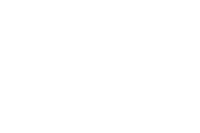

In [2]:
# item containing our vegetation data to edit
item_to_edit = arcgis.gis.Item(session_gis, '11f10170934c413c8db8a40563ed9a4a')
item_to_edit

In [3]:
# We'll be focusing on the point layer for the time being.
lyr_points = item_to_edit.layers[0]

## What we already know about this layer.
 - There's a unique ID field called **AUTO_ID** that we're maintaining.
 - The IDs we put in there were formatted like **ID_00001** with incrementing unique numbers
 

Firstly, let's look to see if we can find any duplicate IDs in our dataset.  There are a couple different ways to do this, but first we'll have to query the data.

In [4]:
# let's query the data.  We'll omit the geometry because we don't need it.
fset_all = lyr_points.query(return_geometry=False)

Now let's iterate through the data and see if we can identify any duplicate IDs.  Let's think through this with pseudo code.  
Check out Method 1 in the following link: <br> https://www.geeksforgeeks.org/python-get-unique-values-list/

What we'll need to do is:

1. Set up an empty list to store our unique IDs
1. Set up an empty list to store any dupilicate IDs
1. iterate through each feature in the FeatureSet (which is called fset_all and has a property called features)
- for each feature
  - "get" the unique ID (Hint - Feature objects have a method called "get_value")
  - check to see if that unique ID is already in our list of uniques
       - if it is already in our list of unique IDs, add it to our list of duplicate IDs
       - if it's not in our list of unique IDs, add it to the list of unique IDs

In [5]:
unique_ids = []
duplicate_ids = []

# now try to implement your own code to find duplicates in the field "AUTO_ID"



In [6]:

display(tag)

############### Write code below ##################

unique_ids = []
duplicate_ids = []

for feature in fset_all.features:
    auto_id = feature.get_value('AUTO_ID')
    if auto_id in unique_ids:
        duplicate_ids.append(auto_id)
    else:
        unique_ids.append(auto_id)
        

In [ ]:
duplicate_ids

Now that we've identified some duplicates, let's modify our code to blank the duplicates so we can reassign them.  We can insert the following method into our logic we built earlier (when we identify a duplicate).
<br><code>feature.set_value('AUTO_ID','')</code>

In [7]:
unique_ids = []
duplicate_ids = []

for feature in fset_all.features:
    auto_id = feature.get_value('AUTO_ID')
    if auto_id in unique_ids:
        feature.set_value('AUTO_ID','')
    else:
        unique_ids.append(auto_id)
        

In [8]:
# remember our list comprehentions from before?
all_ids = [feature.get_value('AUTO_ID') for feature in fset_all.features]
print(len(all_ids))

# this is method two from the link above. using the set() property in Python
unique_ids = list(set(all_ids))
print(len(unique_ids))

41
40


## Finding out the highest number in our ID list

Because we made these IDs up, they're all in a format we know.  That means we can break them apart to do numeric comparisons with the numbers in the IDs.

Our IDs are <code>string</code> data objects with an underscore in the middle.  Like **ID_00001**.  Let's use the <code>.split()</code> method to turn our ID string into a <code>list</code> object with a length of 2.  Once we've done that, we can turn the second item in our list to an integer using <code>int()</code>.

Let's try to write a function.  If you need a hint, my version of the function will be in the next cell.

In [10]:
def split_ID_get_number(string_id):
    # your code here
    pass


In [13]:

display(tag)

############### Write code below ##################


def split_ID_get_number(string_id):
    # split the ID into a list
    list_id = string_id.split("_")
    
    # cast the second item in the list as an integer
    int_id = int(list_id[1])
    return int_id
    


In [ ]:
print(split_ID_get_number('ID_00001'))
print(split_ID_get_number('ID_00201'))

In [14]:
# all_int_ids = [split_ID_get_number(auto_id) for auto_id in all_ids ]
all_int_ids = [split_ID_get_number(auto_id) for auto_id in all_ids if 'ID' in auto_id]

In [15]:
max(all_int_ids)

41

### Now let's build a function that puts all this together.

 - Our input should be a list of feature objects
 - Our output should be one integer that represents the max number in any id.
 - Feel free to use <code>split_ID_get_number()</code> in this new function.

In [ ]:
def get_max_id_int(list_of_features):
    # your code here
    pass

In [16]:

display(tag)

############### Write code below ##################


def get_max_id_int(list_of_features):
    # get all the IDs
    all_ids = [feature.get_value('AUTO_ID') for feature in list_of_features if feature.get_value("AUTO_ID") != None]
    
    # extract the integers from all the IDs
    all_int_ids = [split_ID_get_number(auto_id) for auto_id in all_ids if 'ID' in auto_id]
    
    # return the max of the integers
    return max(all_int_ids)

    


Now let's test this function

In [20]:
current_max = get_max_id_int(fset_all.features)
current_max

41

## Adding New IDs

Now let's add IDs to any of our features that doesn't have an ID.  This will include the ones that we blanked out.  Note that earlier when we were fixing duplicates, we set those IDs to <code>''</code> instead of <code>None</code>.  We should be able to lift our code from the last notebook we worked on.


In [21]:
def format_id(num):
    #change the number to a string
    str_num = str(num)
    # build an ID using .zfill() to pad our number
    new_id = "ID_{}".format(str_num.zfill(5))
    return new_id

In [ ]:
# your code here...

In [25]:
display(tag)

############### Write code below ##################

counter = current_max + 1
for feature in fset_all.features:
    # create a new id with the counter
    if feature.get_value('AUTO_ID') == None or feature.get_value("AUTO_ID") == '':
        new_id = format_id(counter)

        # insert the new id into a feature
        feature.set_value('AUTO_ID', new_id)

        # increase the counter (so we don't have duplicates)
        counter += 1

Now we can double-check our data by looking at it as a DataFrame

In [26]:
fset_all.sdf

,OBJECTID,GlobalID,CreationDate,Creator,EditDate,Editor,VTYPE,SPECIES,DIAMETER,HEIGHT,AUTO_ID,COUNTY,STATUS,TW_STATUS
0,1,408b9cc9-a9a1-400c-804d-e6f8b617d611,2019-02-26 03:11:55.551000118,dancranford,2020-04-28 21:12:39.369999886,DaveC_BayGeo,Brush,None,NaN,NaN,ID_00001,Alameda,Work Prescribed,Assigned
1,2,95a4cc36-a2a8-40de-8809-cd0669322012,2019-02-26 03:12:26.028000116,dancranford,2020-04-28 21:12:39.369999886,DaveC_BayGeo,Tree,None,NaN,NaN,ID_00002,Alameda,Complete,Completed
2,3,397a9495-788c-42cb-84c0-aacf7ceef8db,2019-02-26 03:13:02.457999945,dancranford,2020-04-28 21:12:39.369999886,DaveC_BayGeo,Tree,None,NaN,NaN,ID_00003,Alameda,Work Prescribed,Unassigned
3,4,cc8409e3-c5a0-42c3-978b-253c216a165f,2019-03-07 03:33:42.572000027,dancranford,2020-04-28 21:12:39.369999886,DaveC_BayGeo,Brush,None,NaN,NaN,ID_00004,Riverside,Work Prescribed,Completed
4,5,0660960c-3d81-49a9-8085-d2348dad0a99,2019-03-07 03:38:25.000000000,dancranford,2020-04-28 21:12:39.369999886,DaveC_BayGeo,Tree,None,NaN,NaN,ID_00005,Riverside,Inventory,Assigned
5,6,3bac3885-7d48-475a-9945-69ea4a7fadb0,2019-03-07 03:38:41.000000000,dancranford,2020-04-28 21:12:39.369999886,DaveC_BayGeo,Brush,None,NaN,NaN,ID_00006,Riverside,Contact,Assigned
6,7,71bfee7f-68c9-4ddd-b23d-285e28b3811b,2019-05-08 16:01:56.976999998,dancranford,2020-04-28 21:12:39.369999886,DaveC_BayGeo,Brush,🚌🚌🚌🚌,NaN,NaN,ID_00007,Alameda,Refusal,Assigned
7,8,9d7e752a-8183-4147-a0d4-2bc6d186d206,2019-10-18 20:45:41.516000032,dancranford,2020-04-28 21:12:39.369999886,DaveC_BayGeo,Tree,tree,2.0,2.0,ID_00008,Alameda,Work Prescribed,Assigned
8,9,3708689d-f8a5-4a5a-9623-7e7076f1df10,2020-04-28 21:06:26.368000031,dancranford,2020-04-28 21:12:39.369999886,DaveC_BayGeo,Brush,None,NaN,NaN,ID_00009,None,Active,Assigned
9,10,a9b2ec29-bd59-4c0d-80a8-9a76b1641db2,2020-04-28 21:06:27.711999893,dancranford,2020-04-28 21:12:39.369999886,DaveC_BayGeo,Brush,None,NaN,NaN,ID_00010,None,Active,Assigned


In [27]:
lyr_points.edit_features(updates = fset_all.features)

{'addResults': [],
 'updateResults': [{'objectId': 1,
   'uniqueId': 1,
   'globalId': '408b9cc9-a9a1-400c-804d-e6f8b617d611',
   'success': True},
  {'objectId': 2,
   'uniqueId': 2,
   'globalId': '95a4cc36-a2a8-40de-8809-cd0669322012',
   'success': True},
  {'objectId': 3,
   'uniqueId': 3,
   'globalId': '397a9495-788c-42cb-84c0-aacf7ceef8db',
   'success': True},
  {'objectId': 4,
   'uniqueId': 4,
   'globalId': 'cc8409e3-c5a0-42c3-978b-253c216a165f',
   'success': True},
  {'objectId': 5,
   'uniqueId': 5,
   'globalId': '0660960c-3d81-49a9-8085-d2348dad0a99',
   'success': True},
  {'objectId': 6,
   'uniqueId': 6,
   'globalId': '3bac3885-7d48-475a-9945-69ea4a7fadb0',
   'success': True},
  {'objectId': 7,
   'uniqueId': 7,
   'globalId': '71bfee7f-68c9-4ddd-b23d-285e28b3811b',
   'success': True},
  {'objectId': 8,
   'uniqueId': 8,
   'globalId': '9d7e752a-8183-4147-a0d4-2bc6d186d206',
   'success': True},
  {'objectId': 9,
   'uniqueId': 9,
   'globalId': '3708689d-f8a5-4a